<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/GroupByWeekday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실내수집 자료를 사용한 자료 분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**groupby 이해하기**
> 전체 데이터를 그룹 별로 나누고 (split), 각 그룹별로 집계함수를 적용(apply) 한후, 그룹별 집계 결과를 하나로 합치는(combine) 단계를 수행함 

* city를 그룹으로 나누어 집계한 후 결과를 결합함

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


* city의 값은 부산과 서울로 구분되어 그룹핑함

In [ ]:
df.groupby('city').mean()

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


* 그룹핑에 참여하는 컬럼별 자료수

In [ ]:
df.groupby('city').count()

,fruits,price,quantity
city,,,
부산,4,4,4
서울,3,3,3


In [ ]:
df.groupby('city')['price'].mean()

city
부산    212.5
서울    250.0
Name: price, dtype: float64

* fruits의 값은 apple, banna, orange 로 3개의 그룹이 구성됨

In [ ]:
df.groupby('fruits').mean()

,price,quantity
fruits,,
apple,150.000000,4.000000
banana,316.666667,4.666667
orange,200.000000,2.000000


In [ ]:
# city와 fruits로 그룹핑
df.groupby(['city', 'fruits']).mean()

price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

* 집계를 개별적으로 수행함
> 가격은 평균(mean)을 구하고, 수량은 합(np.sum)을 구함

In [ ]:
def my_mean(s):
    return np.mean(s)

df.groupby('city').agg({'price': my_mean, 'quantity': np.sum})

,price,quantity
city,,
부산,212.5,10
서울,250.0,18


In [ ]:
# 그룹핑을 위한 city와 fruits 을 색인으로 구성하지 않음
df.groupby(['city', 'fruits'], as_index=False).apply(lambda d: (d.price * d.quantity).sum())


,city,fruits,NaN
0,부산,apple,100
1,부산,banana,1950
2,부산,orange,400
3,서울,apple,1950
4,서울,banana,2800


#### 센서데이터 처리
* 요일별 자료 집계

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

my_url = "/content/gdrive/MyDrive/Colab Notebooks/data/April_sensor_data.csv"
 

Mounted at /content/gdrive/


In [ ]:
# 요일값 얻기
idx = pd.date_range(start='2021-05-24', freq='D', periods=4)
idx.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object')

센서 값에 따른 자료특성 변화

In [ ]:
my_url= "https://raw.githubusercontent.com/iceman67/HRS/master/April_sensor_data.csv"


#data frame
df = pd.read_csv(my_url, parse_dates=['REG_DATE'])

In [ ]:
df.shape

(25920, 8)

In [ ]:
df.head()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
0,1,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16
1,2,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15
2,3,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20
3,4,2020-04-02 00:03:00,7.83,6.19,21.5,22.1,1.81,4.17
4,5,2020-04-02 00:04:00,8.12,6.19,21.6,22.1,1.85,4.20


In [ ]:
df['ds'] = df['REG_DATE']

In [ ]:
df['y'] = df['Huminity']

In [ ]:
df.columns

Index(['NO', 'REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2', 'ds', 'y'],
      dtype='object')

In [ ]:
# index 컬럼 지정 
df = df.set_index("NO", drop = True)

# 요일이름 얻기  
df['weekday'] = df['REG_DATE'].dt.day_name()
print(df.columns)

Index(['REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC', 'CO2',
       'ds', 'y', 'weekday'],
      dtype='object')


In [ ]:
df.shape

(25920, 10)

In [ ]:
df.head(3)

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
1,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16,2020-04-02 00:00:00,22.1,Thursday
2,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15,2020-04-02 00:01:00,22.1,Thursday
3,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20,2020-04-02 00:02:00,22.1,Thursday


In [ ]:
df_monday = df[df['weekday']=='Monday']
df_monday.tail()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
17276,2020-04-13 23:55:00,11.32,12.38,19.5,25.4,2.04,4.27,2020-04-13 23:55:00,25.4,Monday
17277,2020-04-13 23:56:00,12.19,12.38,19.6,25.4,2.04,4.29,2020-04-13 23:56:00,25.4,Monday
17278,2020-04-13 23:57:00,12.48,12.38,19.6,25.4,2.07,4.24,2020-04-13 23:57:00,25.4,Monday
17279,2020-04-13 23:58:00,10.74,12.38,19.6,25.4,2.06,4.28,2020-04-13 23:58:00,25.4,Monday
17280,2020-04-13 23:59:00,11.03,12.38,19.6,25.4,2.04,4.30,2020-04-13 23:59:00,25.4,Monday


In [ ]:
df_monday = df[df['weekday']=='Monday']
df_tuesday = df[df['weekday']=='Tuesday']
df_wednesday = df[df['weekday']=='Wednesday']
df_thursday = df[df['weekday']=='Thursday']
df_friday = df[df['weekday']=='Friday']

df_saturday = df[df['weekday']=='Saturday']
df_sunday = df[df['weekday']=='Sunday']


In [ ]:
df_sunday.shape

(4320, 10)

In [ ]:
df_sunday.tail()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
25916,2020-04-19 23:55:00,4.35,4.35,20.6,42.3,1.76,7.70,2020-04-19 23:55:00,42.3,Sunday
25917,2020-04-19 23:56:00,4.21,4.22,20.6,42.3,1.78,7.69,2020-04-19 23:56:00,42.3,Sunday
25918,2020-04-19 23:57:00,5.07,5.07,20.6,42.3,1.76,7.66,2020-04-19 23:57:00,42.3,Sunday
25919,2020-04-19 23:58:00,3.90,3.90,20.6,42.3,1.77,7.71,2020-04-19 23:58:00,42.3,Sunday
25920,2020-04-19 23:59:00,4.64,4.64,20.6,42.3,1.74,7.70,2020-04-19 23:59:00,42.3,Sunday


In [ ]:
df_workday = pd.concat([df_monday,df_tuesday, df_wednesday, df_thursday, df_friday])
df_weekend = pd.concat([df_saturday,df_sunday])
#df_weekend = pd.concat([df_saturday])

In [ ]:
df_weekend.shape

(8640, 10)

In [ ]:
df_workday.describe()

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,y
count,17280.000000,17280.000000,17280.000000,17280.000000,17279.000000,17279.000000,17280.000000
mean,14.795528,14.822488,20.295770,25.242321,2.088653,4.455054,25.242321
std,7.727320,7.411921,1.169316,5.078978,0.290255,1.038293,5.078978
min,3.480000,6.190000,18.100000,15.000000,1.100000,2.150000,15.000000
25%,9.870000,12.380000,19.300000,22.300000,1.930000,3.840000,22.300000
50%,13.060000,12.380000,20.200000,24.500000,2.060000,4.310000,24.500000
75%,18.080000,18.570000,21.000000,26.800000,2.230000,4.880000,26.800000
max,74.570000,61.900000,25.200000,43.300000,6.860000,8.310000,43.300000


In [ ]:
df_weekend.describe()

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,y
count,8640.000000,8640.000000,8639.000000,8639.000000,8640.000000,8640.000000,8639.000000
mean,11.999606,11.973071,20.154786,29.661824,1.901799,5.217382,29.661824
std,8.427809,7.610504,0.765153,8.768501,0.219557,1.781602,8.768501
min,1.480000,0.000000,18.600000,13.300000,1.440000,1.880000,13.300000
25%,6.670000,6.190000,19.500000,23.700000,1.770000,3.940000,23.700000
50%,10.440000,11.840000,20.300000,30.500000,1.880000,5.160000,30.500000
75%,13.930000,12.380000,20.800000,37.300000,2.020000,6.930000,37.300000
max,67.030000,55.710000,22.000000,43.400000,2.470000,8.020000,43.400000


In [ ]:
df_workday.head()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,ds,y,weekday
NO,,,,,,,,,,
5761,2020-04-06 00:00:00,7.83,6.19,19.1,23.8,1.95,3.92,2020-04-06 00:00:00,23.8,Monday
5762,2020-04-06 00:01:00,7.83,6.19,19.1,23.8,1.94,3.89,2020-04-06 00:01:00,23.8,Monday
5763,2020-04-06 00:02:00,8.12,6.19,19.1,23.9,1.92,3.92,2020-04-06 00:02:00,23.9,Monday
5764,2020-04-06 00:03:00,10.16,12.38,19.1,23.8,1.91,3.91,2020-04-06 00:03:00,23.8,Monday
5765,2020-04-06 00:04:00,11.90,12.38,19.1,23.9,1.93,3.95,2020-04-06 00:04:00,23.9,Monday


### 요일 groupby 
df.groupby('column1')

In [ ]:
df.groupby('weekday')

In [ ]:
week_df = df.groupby(df['weekday']).mean()

In [ ]:
week_df

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,y
weekday,,,,,,,
Friday,17.002421,16.502553,20.953241,29.277060,2.243400,5.413275,29.277060
Monday,8.378153,8.730479,19.610347,23.084792,1.949441,3.890170,23.084792
Saturday,13.114808,13.139979,20.404168,30.553508,1.986215,5.449787,30.553508
Sunday,10.884405,10.806162,19.905463,28.770347,1.817382,4.984977,28.770347
Thursday,15.080028,15.104558,20.793750,22.629282,2.072097,4.080234,22.629282
Tuesday,13.542538,13.804740,19.885139,28.634375,2.186941,4.935684,28.634375
Wednesday,18.728806,18.989042,19.658646,21.875243,1.922243,3.664010,21.875243


In [ ]:
df.groupby('weekday').groups

{'Friday': [1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, ...], 'Monday': [5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822,

In [ ]:
df_workday = df_workday.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [ ]:
df_weekend = df_weekend.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [ ]:
df_weekend.columns

Index(['REG_DATE', 'PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC', 'CO2',
       'ds', 'y', 'weekday'],
      dtype='object')

### 자료 시각화

In [ ]:
import matplotlib.pyplot as plt

NameError: ignored

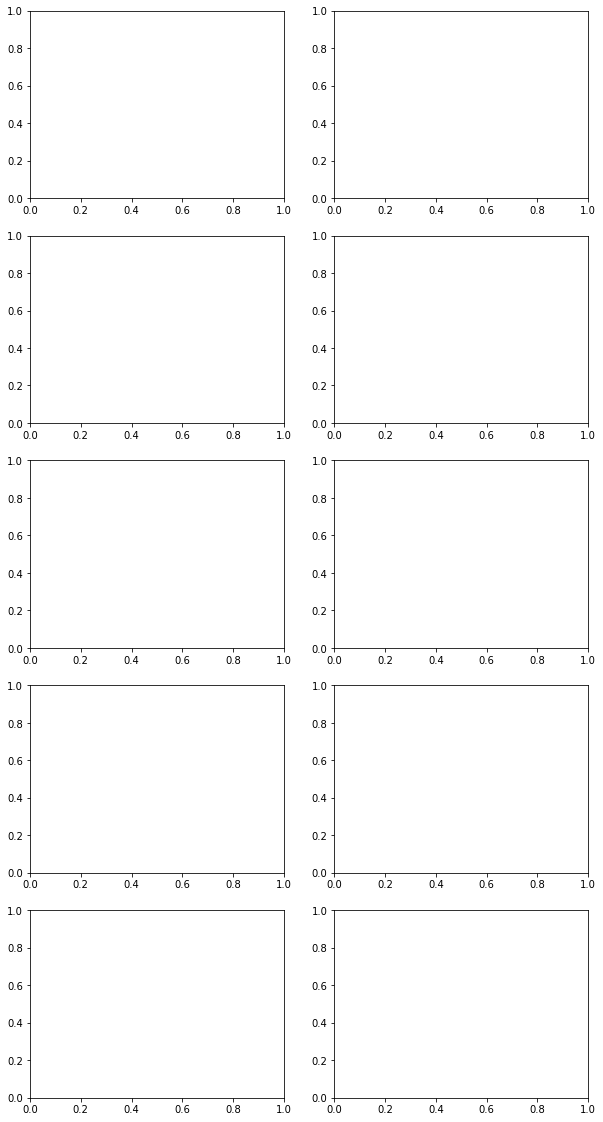

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(10,20))
x  = list(range(len(df_workday['PM25'])))
axes[0][0].plot(x, df_workday['PM25'])
axes[0][0].set_title ('workday PM2.5')

x1  = list(range(len(df_weekend['PM25'])))
axes[0][1].plot(x1, df_weekend['PM25'])
axes[0][1].set_title ('weekend PM2.5') 


axes[1][0].plot(x, df_workday['Temperature'])
axes[1][0].set_title ('workday Temperature')

axes[1][1].plot(x1, df_weekend['Temperature'])
axes[1][1].set_title ('weekend Temperature') 

axes[2][0].plot(x, df_workday['CO2'])
axes[2][0].set_title ('workday CO2')

axes[2][1].plot(x1, df_weekend['CO2'])
axes[2][1].set_title ('weekend CO2') 

axes[3][0].plot(x, df_workday['Humidity'])
axes[3][0].set_title ('workday Humidity')

axes[3][1].plot(x1, df_weekend['Humidity'])
axes[3][1].set_title ('weekend Humidity') 

axes[4][0].plot(x, df_workday['TVOC'])
axes[4][0].set_title ('workday TVOC')

axes[4][1].plot(x1, df_weekend['TVOC'])
axes[4][1].set_title ('weekend TVOC') 

plt.show()

In [ ]:
import numpy as np

def is_outlier(points, threshold=1):
    if len(points.shape) == 1:
        points = points[:, None]
    
    median = np.median(points, axis=0)
    
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    
    return modified_z_score > threshold



In [ ]:
df_workday['PM25'].shape

In [ ]:
filtered = df_workday[~is_outlier(df_workday['PM25'])]

filtered.head()

In [ ]:
buckets=30

plt.figure()

plt.subplot(211)
plt.hist(df_workday['PM25'], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered['PM25'], buckets)
plt.xlabel('Cleaned')

plt.show()


In [ ]:
filtered1 = df_weekend[~is_outlier(df_weekend['PM25'])]

In [ ]:
buckets=30

plt.figure()

plt.subplot(211)
plt.hist(df_weekend['PM25'], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered1['PM25'], buckets)
plt.xlabel('Cleaned')

plt.show()

In [ ]:
filtered = df_weekend[~is_outlier(df_weekend['CO2'])]
filtered1 = df_workday[~is_outlier(df_workday['CO2'])]

In [ ]:
buckets=30
sensor_name = 'CO2'
plt.figure()

plt.subplot(211)
plt.hist(df_weekend[sensor_name], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered[sensor_name], buckets)
plt.xlabel('Cleaned')

plt.show()

In [ ]:
buckets=30
sensor_name = 'CO2'
plt.figure()

plt.subplot(211)
plt.hist(df_workday[sensor_name], buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered1[sensor_name], buckets)
plt.xlabel('Cleaned')

plt.show()

In [ ]:
from pylab import *
def moving_average(interval, window_size):
    window = ones(int(window_size)) / float(window_size)
    return convolve(interval, window, 'same')

In [ ]:
x  = list(range(len(df_workday['PM25'])))
plt.plot(x, df_workday['PM25'])
 

y_av = moving_average(df_workday['PM25'],10)
plt.plot(x, y_av)

In [ ]:
 
x  = list(range(len(df_workday['CO2'])))
plt.plot(x, df_workday['CO2'])
 

y_av = moving_average(df_workday['CO2'],10)
plt.plot(x, y_av)

In [ ]:
x  = list(range(len(df_weekend['CO2'])))
plt.plot(x, df_weekend['CO2'], 'k.')
 

y_av = moving_average(df_weekend['CO2'],10)
plt.plot(x, y_av, 'r')

!pip install fbprophet

In [ ]:
from fbprophet import Prophet 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)
df.tail()

In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [ ]:
m = Prophet()
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast.tail()

In [ ]:
forecast.iloc[-365:, :].yhat.plot()

In [ ]:
import matplotlib.pyplot as plt
fig1 = m.plot(forecast, uncertainty=False)
plt.show()

In [ ]:
fig2 = m.plot_components(forecast)
plt.show()